# The Elias Omega Code

The Elias omega code is a universal, prefix-free code for encoding positive integers. Given a positive integer $n$, the Elias omega codeword of $n$ is denoted by $\omega(n)$.

For a positive integer $n$, the Elias omega code $\omega(n)$ is constructed as follows:

1. Initialize the string `code` to be `0`.
2. While $n > 1$:
   - Prepend the binary representation of $n$ to the beginning of `code`.
   - Set $n$ equal to $\lfloor \log_{2} n \rfloor$ (i.e., the length of the binary representation of $n$ minus 1).
3. Output `code`.



Example:

- $\omega(1) = 0$
- $\omega(4) = 10\_100\_0 = 101000$
- $\omega(9) = 11\_1001\_0 = 1110010$

*Note: The underscores in the above examples are included only for readability to separate pieces of the codewords; they are not part of the actual codewords.*

In this notebook, we'll implement encoding, decoding, and length functions for the Elias omega code.

# Imports

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import display

# Function Definitions

In this section, we define the core functions for Elias omega coding:

- `omega_encode`
- `omega_decode`
- `omega_length`
- `omega_implied_probability`

These functions form the foundation for encoding, decoding, and analyzing universal codes throughout this demo.

## `omega_encode`

Encode a positive integer or a sequence of positive integers using Elias omega coding.

In [2]:
def omega_encode(numbers, collapse=True):
    def encode_single(number):
        if number <= 0:
            raise ValueError("Number must be positive")
        code = "0"
        while number > 1:
            binary = bin(number)[2:]
            code = binary + code
            number = len(binary) - 1
        return code

    if isinstance(numbers, int):
        return encode_single(numbers)

    try:
        encoded = [omega_encode(number) for number in numbers]
        return "".join(encoded) if collapse else encoded
    except TypeError:
        raise ValueError("Input must be a positive integer or an iterable of positive integers")

## `omega_decode`

Decode an Elias omega codeword or a sequence of codewords into their corresponding positive integers.

In [3]:
def omega_decode(code, as_list=False):
    results = []
    index = 0

    while index < len(code):
        n = 1
        while code[index] != "0":
            num_bits = n + 1
            if index + num_bits > len(code):
                raise ValueError("Malformed Elias omega code")
            n = int(code[index:index+num_bits], 2)
            index += num_bits
        index += 1  # skip the terminating 0
        results.append(n)

    return results if as_list or len(results) > 1 else results[0]

## `omega_length`

Return the length of the Elias omega codeword for a positive integer.

In [4]:
def omega_length(numbers, as_list=False):
    def length(number):
        if n <= 0:
            raise ValueError("Number must be positive")
        length = 1
        while number > 1:
            bit_length = number.bit_length()
            length += bit_length
            number = bit_length - 1
        return length

    if isinstance(numbers, int):
        return length(numbers) if not as_list else [length(numbers)]

    try:
        return [length(n) for n in numbers]
    except TypeError:
        raise ValueError("Input must be a positive integer or an iterable of positive integers")

## `omega_implied_probability`

Compute the implied probability of Elias omega codewords.

In [5]:
def omega_implied_probability(numbers, as_list=False):
    def prob(n):
        if n <= 0:
            raise ValueError("Number must be positive")
        return 2 ** (-omega_length(n))

    if isinstance(numbers, int):
        return [prob(numbers)] if as_list else prob(numbers)

    try:
        return [prob(n) for n in numbers]
    except TypeError:
        raise ValueError("Input must be a positive integer or an iterable of positive integers")

# Encoding / Decoding Example

We encode several positive integers, decode them, and compute code lengths.

In [6]:
numbers = [1, 2, 3, 5, 8, [3,2], [2,3,5]]
encoded = [omega_encode(number) for number in numbers]
decoded = [omega_decode(code) for code in encoded]
lengths = [omega_length(number) for number in numbers]
probs = [omega_implied_probability(number) for number in numbers]

results_df = pd.DataFrame(
    list(zip(encoded, decoded, lengths, probs)),
    index=pd.Index(numbers, name="Message"),
    columns=[
        "Elias Omega Codeword", "Decoded", "Codeword Length(s)", "Probability (Implied)"
    ]
)

with pd.option_context("display.max_rows", None, "display.max_columns", None):
    display(results_df)

,Elias Omega Codeword,Decoded,Codeword Length(s),Probability (Implied)
Message,,,,
1,0,1,1,0.5
2,100,2,3,0.125
3,110,3,3,0.125
5,101010,5,6,0.015625
8,1110000,8,7,0.007812
"[3, 2]",110100,"[3, 2]","[3, 3]","[0.125, 0.125]"
"[2, 3, 5]",100110101010,"[2, 3, 5]","[3, 3, 6]","[0.125, 0.125, 0.015625]"


## Visualizing Omega Code Lengths

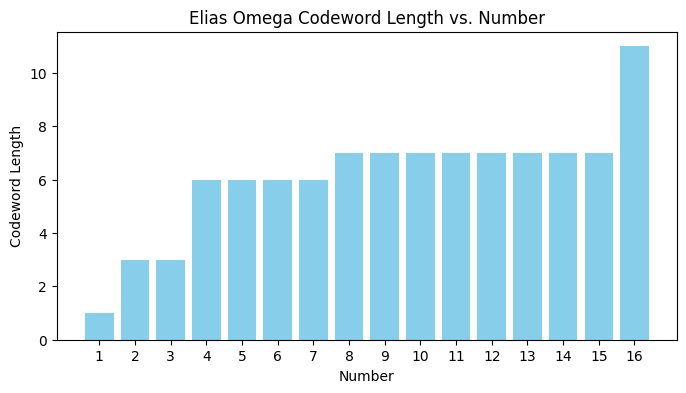

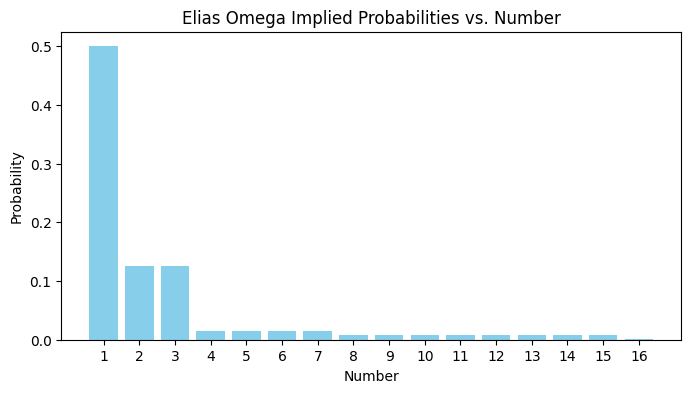

In [7]:
numbers = list(range(1, 17))
code_lengths = [omega_length(number) for number in numbers]
probs = [omega_implied_probability(number) for number in numbers]

fig, ax = plt.subplots(figsize=(8,4))
ax.bar(numbers, code_lengths, color="skyblue")
ax.set_xlabel("Number")
ax.set_ylabel("Codeword Length")
ax.set_title("Elias Omega Codeword Length vs. Number")
ax.set_xticks(numbers)
plt.show()

fig, ax = plt.subplots(figsize=(8,4))
ax.bar(numbers, probs, color="skyblue")
ax.set_xlabel("Number")
ax.set_ylabel("Probability")
ax.set_title("Elias Omega Implied Probabilities vs. Number")
ax.set_xticks(numbers)
plt.show()

### Notes
- Elias omega coding is a recursive universal code for positive integers.
- It is a prefix code and uniquely decodable.
- More efficient than gamma and delta codes for very large integers.
- Often used in universal coding schemes and entropy coding.